In [1]:
import os
from nipype import Workflow, Node, Function

In [2]:
# Create a workflow with one node that adds two numbers together
def sum (a, b):
    return a + b

wf = Workflow ('hello')

adder = Node (Function (input_names = ['a', 'b'],
                        output_names = ['sum'],
                        function = sum),
              name = 'a_plus_b')

adder.inputs.a = 1
adder.inputs.b = 3

wf.add_nodes ([adder])
wf.base_dir = os.getcwd()

eg = wf.run()
list(eg.nodes())[0].result.outputs

190126-08:16:00,336 nipype.workflow INFO:
	 Workflow hello settings: ['check', 'execution', 'logging', 'monitoring']
190126-08:16:00,343 nipype.workflow INFO:
	 Running serially.
190126-08:16:00,346 nipype.workflow INFO:
	 [Node] Setting-up "hello.a_plus_b" in "/Users/z3402744/Dropbox/Jiyang/CNSP/FUTURE/fMRI/Nipype/study_notebook/hello/a_plus_b".
190126-08:16:00,348 nipype.workflow INFO:
	 [Node] Outdated cache found for "hello.a_plus_b".
190126-08:16:00,367 nipype.workflow INFO:
	 [Node] Running "a_plus_b" ("nipype.interfaces.utility.wrappers.Function")
190126-08:16:00,430 nipype.workflow INFO:
	 [Node] Finished "hello.a_plus_b".



sum = 4

In [3]:
# create a second node and add to hello Workflow
def concat (a, b):
    return [a, b]

concater = Node (Function (input_names = ['a', 'b'],
                           output_names = ['some_list'],
                           function = concat),
                 name = 'concat_a_b')

wf.connect (adder, 'sum', concater, 'a')
concater.inputs.b = 3

eg = wf.run()
print (eg.nodes())

190126-08:16:00,471 nipype.workflow INFO:
	 Workflow hello settings: ['check', 'execution', 'logging', 'monitoring']
190126-08:16:00,477 nipype.workflow INFO:
	 Running serially.
190126-08:16:00,481 nipype.workflow INFO:
	 [Node] Setting-up "hello.a_plus_b" in "/Users/z3402744/Dropbox/Jiyang/CNSP/FUTURE/fMRI/Nipype/study_notebook/hello/a_plus_b".
190126-08:16:00,484 nipype.workflow INFO:
	 [Node] Outdated cache found for "hello.a_plus_b".
190126-08:16:00,492 nipype.workflow INFO:
	 [Node] Running "a_plus_b" ("nipype.interfaces.utility.wrappers.Function")
190126-08:16:00,503 nipype.workflow INFO:
	 [Node] Finished "hello.a_plus_b".
190126-08:16:00,505 nipype.workflow INFO:
	 [Node] Setting-up "hello.concat_a_b" in "/Users/z3402744/Dropbox/Jiyang/CNSP/FUTURE/fMRI/Nipype/study_notebook/hello/concat_a_b".
190126-08:16:00,510 nipype.workflow INFO:
	 [Node] Outdated cache found for "hello.concat_a_b".
190126-08:16:00,517 nipype.workflow INFO:
	 [Node] Running "concat_a_b" ("nipype.interfaces

In [4]:
# chech results of workflow
list(eg.nodes())[0].result.outputs


sum = 4

In [5]:
# add another node
def plus_one (a):
    return a + 1

plusone = Node (Function (input_names = ['a'],
                          output_names = ['out'],
                          function = plus_one),
                name = 'plus_1')

wf.connect (concater, 'some_list', plusone, 'a')

try:
    eg = wf.run()
except (RuntimeError) as err:
    print ('RuntimeError:', err)
else:
    raise

190126-08:16:00,568 nipype.workflow INFO:
	 Workflow hello settings: ['check', 'execution', 'logging', 'monitoring']
190126-08:16:00,574 nipype.workflow INFO:
	 Running serially.
190126-08:16:00,576 nipype.workflow INFO:
	 [Node] Setting-up "hello.a_plus_b" in "/Users/z3402744/Dropbox/Jiyang/CNSP/FUTURE/fMRI/Nipype/study_notebook/hello/a_plus_b".
190126-08:16:00,581 nipype.workflow INFO:
	 [Node] Cached "hello.a_plus_b" - collecting precomputed outputs
190126-08:16:00,583 nipype.workflow INFO:
	 [Node] "hello.a_plus_b" found cached.
190126-08:16:00,585 nipype.workflow INFO:
	 [Node] Setting-up "hello.concat_a_b" in "/Users/z3402744/Dropbox/Jiyang/CNSP/FUTURE/fMRI/Nipype/study_notebook/hello/concat_a_b".
190126-08:16:00,590 nipype.workflow INFO:
	 [Node] Outdated cache found for "hello.concat_a_b".
190126-08:16:00,598 nipype.workflow INFO:
	 [Node] Running "concat_a_b" ("nipype.interfaces.utility.wrappers.Function")
190126-08:16:00,610 nipype.workflow INFO:
	 [Node] Finished "hello.conc

In [6]:
# Read crash file
# Note that if you have multiple crash files in the directory, you will need to specify the full name
!nipypecli crash crash*
# The error was due to we were trying to add a list with a integer which is not allowed in python.
# This can be solved by creating plus_1 as MapNode

Usage: nipypecli crash [OPTIONS] CRASHFILE
Try "nipypecli crash -h" for help.

Error: Got unexpected extra argument (crash-20190126-081600-z3402744-plus_1-42b7b494-ce4a-4376-9f2c-ca3ed4618b65.pklz)


In [7]:
from nipype import MapNode
plusone = MapNode (Function (input_names = ['a'],
                             output_names = ['out'],
                             function = plus_one),
                   iterfield = ['a'],
                   name = 'add_1')

wf = Workflow ('hello_mapnode')

adder = Node (Function (input_names = ['a', 'b'],
                        output_names = ['sum'],
                        function = sum),
              name = 'a_plus_b')

adder.inputs.a = 1
adder.inputs.b = 3

wf.connect (adder, 'sum', concater, 'a')
concater.inputs.b = 3

wf.connect (concater, 'some_list', plusone, 'a')

wf.base_dir = os.getcwd()

eg = wf.run()
print (eg.nodes())

190126-08:16:01,787 nipype.workflow INFO:
	 Workflow hello_mapnode settings: ['check', 'execution', 'logging', 'monitoring']
190126-08:16:01,795 nipype.workflow INFO:
	 Running serially.
190126-08:16:01,797 nipype.workflow INFO:
	 [Node] Setting-up "hello_mapnode.a_plus_b" in "/Users/z3402744/Dropbox/Jiyang/CNSP/FUTURE/fMRI/Nipype/study_notebook/hello_mapnode/a_plus_b".
190126-08:16:01,802 nipype.workflow INFO:
	 [Node] Cached "hello_mapnode.a_plus_b" - collecting precomputed outputs
190126-08:16:01,803 nipype.workflow INFO:
	 [Node] "hello_mapnode.a_plus_b" found cached.
190126-08:16:01,805 nipype.workflow INFO:
	 [Node] Setting-up "hello.concat_a_b" in "/Users/z3402744/Dropbox/Jiyang/CNSP/FUTURE/fMRI/Nipype/study_notebook/hello/concat_a_b".
190126-08:16:01,813 nipype.workflow INFO:
	 [Node] Cached "hello.concat_a_b" - collecting precomputed outputs
190126-08:16:01,815 nipype.workflow INFO:
	 [Node] "hello.concat_a_b" found cached.
190126-08:16:01,817 nipype.workflow INFO:
	 [Node] Se

In [8]:
# see the result of hello.add_1
list(eg.nodes())[2].result.outputs


some_list = [4, 3]

190126-08:16:02,303 nipype.workflow INFO:
	 Generated workflow graph: /Users/z3402744/Dropbox/Jiyang/CNSP/FUTURE/fMRI/Nipype/study_notebook/hello_mapnode/graph.png (graph2use=exec, simple_form=True).


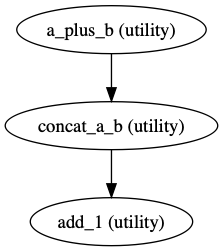

In [9]:
# visualise
wf.write_graph (graph2use = 'exec')
from IPython.display import Image
Image ('hello_mapnode/graph.png')

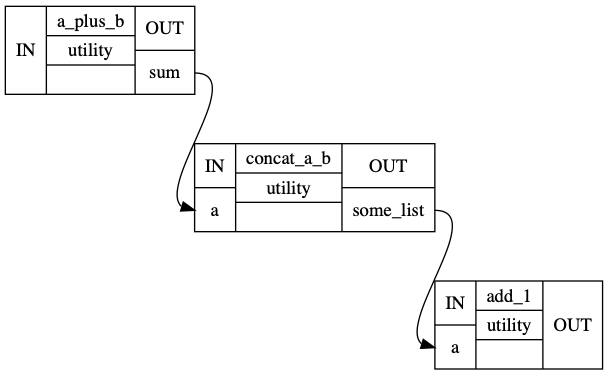

In [10]:
Image ('hello_mapnode/graph_detailed.png')

In [11]:
# JoinNode - merge results together
def merge_and_scale_data (data2):
    import numpy as np
    return (np.array(data2) * 1000).tolist()

from nipype import JoinNode
joiner = JoinNode (Function (input_names = ['data2'],
                             output_names = ['data_scaled'],
                             function = merge_and_scale_data),
                   name = 'join_scale_data',
                   joinsource = adder,
                   joinfield = ['data2'])

wf.connect (plusone, 'out', joiner, 'data2')

eg = wf.run()
eg.nodes

190126-08:16:02,342 nipype.workflow INFO:
	 Workflow hello_mapnode settings: ['check', 'execution', 'logging', 'monitoring']
190126-08:16:02,349 nipype.workflow INFO:
	 Running serially.
190126-08:16:02,351 nipype.workflow INFO:
	 [Node] Setting-up "hello_mapnode.a_plus_b" in "/Users/z3402744/Dropbox/Jiyang/CNSP/FUTURE/fMRI/Nipype/study_notebook/hello_mapnode/a_plus_b".
190126-08:16:02,355 nipype.workflow INFO:
	 [Node] Cached "hello_mapnode.a_plus_b" - collecting precomputed outputs
190126-08:16:02,357 nipype.workflow INFO:
	 [Node] "hello_mapnode.a_plus_b" found cached.
190126-08:16:02,359 nipype.workflow INFO:
	 [Node] Setting-up "hello.concat_a_b" in "/Users/z3402744/Dropbox/Jiyang/CNSP/FUTURE/fMRI/Nipype/study_notebook/hello/concat_a_b".
190126-08:16:02,365 nipype.workflow INFO:
	 [Node] Cached "hello.concat_a_b" - collecting precomputed outputs
190126-08:16:02,366 nipype.workflow INFO:
	 [Node] "hello.concat_a_b" found cached.
190126-08:16:02,368 nipype.workflow INFO:
	 [Node] Se

NodeView((hello.concat_a_b, hello_mapnode.a_plus_b, hello_mapnode.join_scale_data, hello_mapnode.add_1))

In [13]:
list(eg.nodes())[-1].result.outputs

Bunch(out=[5, 4])

In [14]:
wf.write_graph (graph2use = 'exec')

190126-08:29:05,45 nipype.workflow INFO:
	 Generated workflow graph: /Users/z3402744/Dropbox/Jiyang/CNSP/FUTURE/fMRI/Nipype/study_notebook/hello_mapnode/graph.png (graph2use=exec, simple_form=True).


u'/Users/z3402744/Dropbox/Jiyang/CNSP/FUTURE/fMRI/Nipype/study_notebook/hello_mapnode/graph.png'

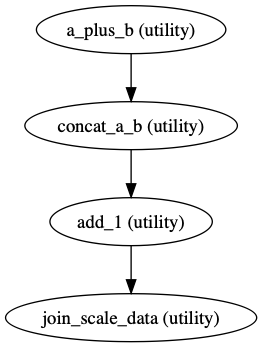

In [15]:
Image ('hello_mapnode/graph.png')

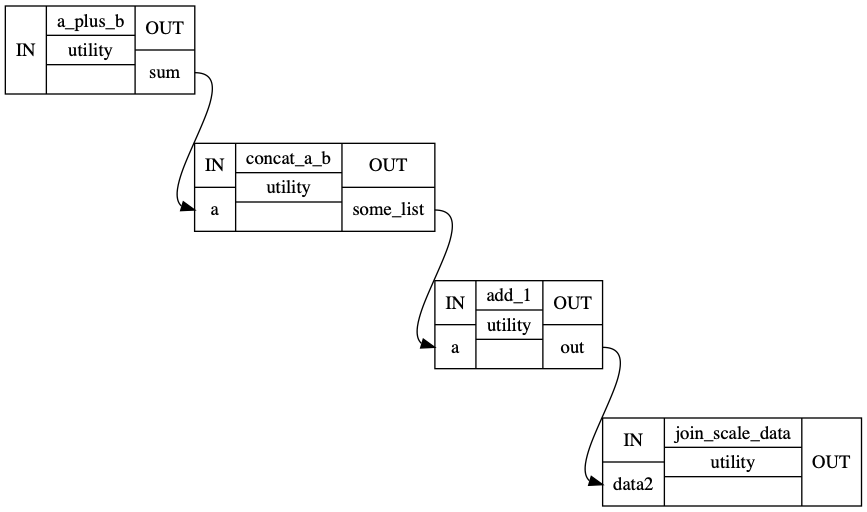

In [16]:
Image ('hello_mapnode/graph_detailed.png')

In [17]:
%time eg = wf.run (plugin = 'MultiProc', plugin_args = {'n_proc': 2})

190126-08:31:21,582 nipype.workflow INFO:
	 Workflow hello_mapnode settings: ['check', 'execution', 'logging', 'monitoring']
190126-08:31:21,596 nipype.workflow INFO:
	 Running in parallel.
190126-08:31:21,615 nipype.workflow INFO:
	 [MultiProc] Running 0 tasks, and 1 jobs ready. Free memory (GB): 7.20/7.20, Free processors: 8/8.
190126-08:31:21,651 nipype.workflow INFO:
	 [Job 0] Cached (hello_mapnode.a_plus_b).
190126-08:31:23,657 nipype.workflow INFO:
	 [Job 1] Cached (hello.concat_a_b).
190126-08:31:27,616 nipype.workflow INFO:
	 [MultiProc] Running 0 tasks, and 2 jobs ready. Free memory (GB): 7.20/7.20, Free processors: 8/8.
190126-08:31:27,649 nipype.workflow INFO:
	 [Job 4] Cached (_add_10).
190126-08:31:27,652 nipype.workflow INFO:
	 [Job 5] Cached (_add_11).
190126-08:31:29,622 nipype.workflow INFO:
	 [MultiProc] Running 0 tasks, and 1 jobs ready. Free memory (GB): 7.20/7.20, Free processors: 8/8.
190126-08:31:29,655 nipype.workflow INFO:
	 [Job 2] Cached (hello_mapnode.add_1)